In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [20]:
df=pd.read_csv('data/stud.csv')

In [21]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
x=df.drop(columns=['math_score'],axis=1)
y=df['math_score']

In [23]:
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [24]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [25]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]
)

In [26]:
x=preprocessor.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape

(800, 19)

In [29]:
## create an evaluate function to give all the metrics after model training

def evaluate_model(true,predicted):
    mse=mean_squared_error(true,predicted)
    mae=mean_absolute_error(true,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true,predicted)
    return mse,mae,rmse,score

In [30]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
}

res=[]

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mse,model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    res.append({
        "Model":list(models.keys())[i],
        "Train R2":model_train_r2,
        "Test R2":model_test_r2
    })

    print(list(models.keys())[i])

    print("Model training performance")
    print("MSE:",model_train_mse)
    print("MAE:",model_train_mae)
    print("RMSE:",model_train_rmse)
    print("R2 score:",model_train_r2)

    print("---------------------------------------------------------------------------------------------")

    print("Model testing performance")
    print("MSE:",model_test_mse)
    print("MAE:",model_test_mae)
    print("RMSE:",model_test_rmse)
    print("R2 score:",model_test_r2)

    print("="*35)



LinearRegression
Model training performance
MSE: 28.362716217041015
MAE: 4.26951171875
RMSE: 5.325665800352198
R2 score: 0.8741936903882622
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 29.388879013061523
MAE: 4.23470703125
RMSE: 5.421151078236201
R2 score: 0.8792262996178921
Lasso
Model training performance
MSE: 43.47840400585579
MAE: 5.206302661246528
RMSE: 6.593815587795566
R2 score: 0.8071462015863456
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 42.50641683841163
MAE: 5.157881810347763
RMSE: 6.519694535667421
R2 score: 0.8253197323627852
Ridge
Model training performance
MSE: 28.33778823308244
MAE: 4.264987823725982
RMSE: 5.323324922741654
R2 score: 0.8743042615212909
---------------------------------------------------------------------------------------------
Model testing performance
MSE: 29.056272192348317
MAE: 4.2111006880

In [31]:
results_df=pd.DataFrame(res)
sorted_df=results_df.sort_values(by=["Test R2"],ascending=False)

In [32]:
sorted_df

,Model,Train R2,Test R2
2,Ridge,0.874304,0.880593
0,LinearRegression,0.874194,0.879226
5,RandomForestRegressor,0.976846,0.853229
6,AdaBoostRegressor,0.850101,0.848258
1,Lasso,0.807146,0.825320
3,KNeighborsRegressor,0.855488,0.783813
4,DecisionTreeRegressor,0.999653,0.770176


In [33]:
## Linear regression
linear=LinearRegression(fit_intercept=True)
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is: ",score)

Accuracy of the model is:  87.92262996178921


Text(0, 0.5, 'Predicted score')

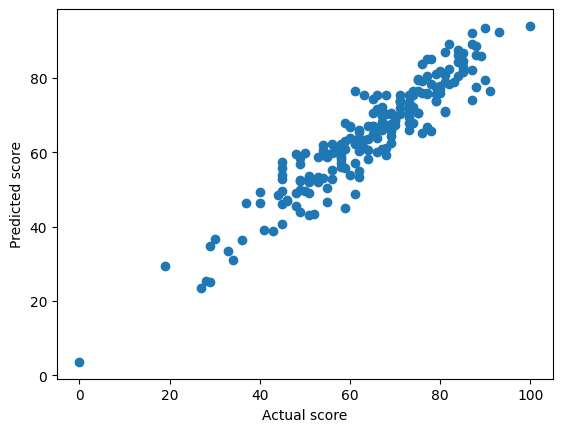

In [34]:
## plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")

<Axes: xlabel='math_score'>

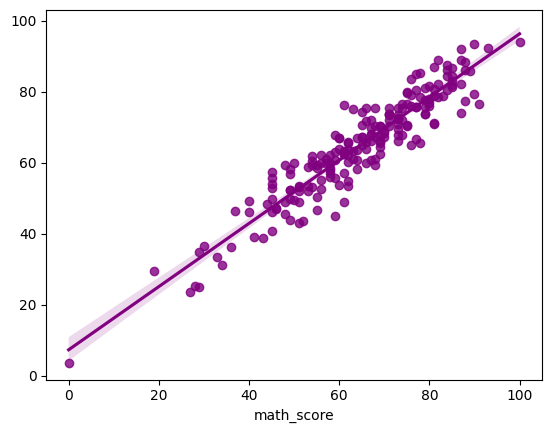

In [35]:
sns.regplot(x=y_test,y=y_pred,color='purple')

In [36]:
pred_df=pd.DataFrame({"Actual Value":y_test,"Predicted Value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.546875,14.453125
737,53,58.839844,-5.839844
740,80,76.945312,3.054688
660,74,76.570312,-2.570312
411,84,87.535156,-3.535156
...,...,...,...
408,52,43.468750,8.531250
332,62,62.042969,-0.042969
208,74,67.843750,6.156250
613,65,67.167969,-2.167969
